Trial

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\navee\OneDrive\Documents\Courses\Projects\electricity_consumption_ML\data\household_power_consumption.txt",delimiter=";")
df.head()

C:\Users\navee\AppData\Local\Temp\ipykernel_25512\2954414610.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\navee\OneDrive\Documents\Courses\Projects\electricity_consumption_ML\data\household_power_consumption.txt",delimiter=";")


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
df = df.head(10000).copy()

In [4]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [5]:
df.shape

(10000, 9)

In [6]:
df.isna().sum()*100/df.shape[0]

Date                     0.00
Time                     0.00
Global_active_power      0.00
Global_reactive_power    0.00
Voltage                  0.00
Global_intensity         0.00
Sub_metering_1           0.00
Sub_metering_2           0.00
Sub_metering_3           0.02
dtype: float64

In [7]:
df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           2
dtype: int64

In [8]:
df[df['Sub_metering_1']=='?']

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN


In [9]:
cols = [col for col in df.columns if col not in ['Date','Time']]
df[cols] = df[cols].replace('?',np.nan)
df[cols] = df[cols].apply(pd.to_numeric, errors= 'coerce')
df[cols] = df[cols].fillna(df[cols].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   10000 non-null  object 
 1   Time                   10000 non-null  object 
 2   Global_active_power    10000 non-null  float64
 3   Global_reactive_power  10000 non-null  float64
 4   Voltage                10000 non-null  float64
 5   Global_intensity       10000 non-null  float64
 6   Sub_metering_1         10000 non-null  float64
 7   Sub_metering_2         10000 non-null  float64
 8   Sub_metering_3         10000 non-null  float64
dtypes: float64(7), object(2)
memory usage: 703.3+ KB


In [10]:
df[df['Global_active_power']=='?']

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

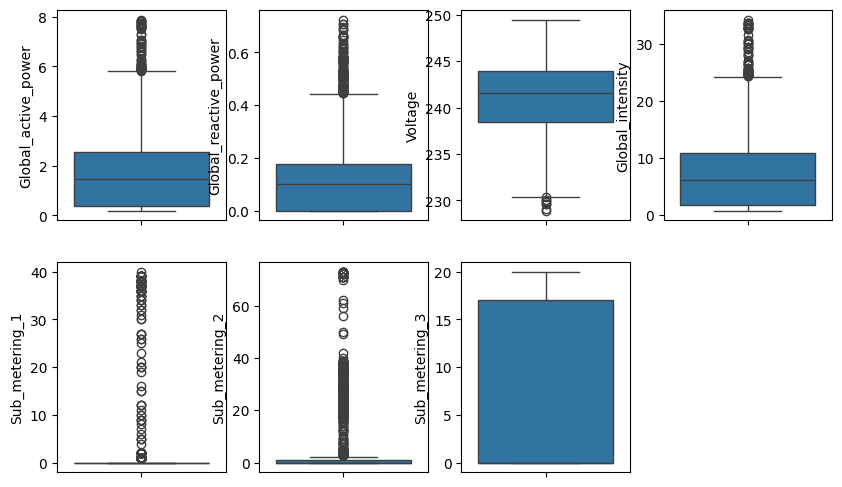

In [12]:
plt.figure(figsize=(10,6))
i=1
for col in cols:
    plt.subplot(2,4,i)
    sns.boxplot(df[col])
    i+=1
plt.show()

In [13]:
#Handling outliers

df[cols].describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.744016,0.118801,241.085660,7.376535,0.885277,2.079816,8.242849
std,1.339772,0.111437,3.673307,5.644298,5.479666,7.674342,8.734773
min,0.194000,0.000000,228.910000,0.800000,0.000000,0.000000,0.000000
25%,0.388000,0.000000,238.500000,1.800000,0.000000,0.000000,0.000000
50%,1.478000,0.100000,241.550000,6.200000,0.000000,0.000000,0.000000
75%,2.560500,0.178000,243.920000,10.800000,0.000000,1.000000,17.000000
max,7.884000,0.724000,249.480000,34.200000,40.000000,73.000000,20.000000


In [14]:
df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [15]:
for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    df = df[(df[col] >= (q1 - 1.5*iqr)) & (df[col] <= (q3 + 1.5*iqr))]
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
13,16/12/2006,17:37:00,5.268,0.398,232.91,22.6,0.0,2.0,17.0
14,16/12/2006,17:38:00,4.054,0.422,235.24,17.6,0.0,1.0,17.0
15,16/12/2006,17:39:00,3.384,0.282,237.14,14.2,0.0,0.0,17.0


In [16]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,8737.000000,8737.000000,8737.000000,8737.000000,8737.0,8737.000000,8737.000000
mean,1.562372,0.110492,241.441273,6.598810,0.0,0.324368,7.967723
std,1.207254,0.099526,3.594527,5.055932,0.0,0.607374,8.732301
min,0.194000,0.000000,230.680000,0.800000,0.0,0.000000,0.000000
25%,0.356000,0.000000,238.950000,1.600000,0.0,0.000000,0.000000
50%,1.396000,0.096000,241.970000,5.800000,0.0,0.000000,0.000000
75%,2.392000,0.166000,244.190000,9.800000,0.0,0.000000,17.000000
max,5.534000,0.444000,249.480000,23.200000,0.0,2.000000,20.000000


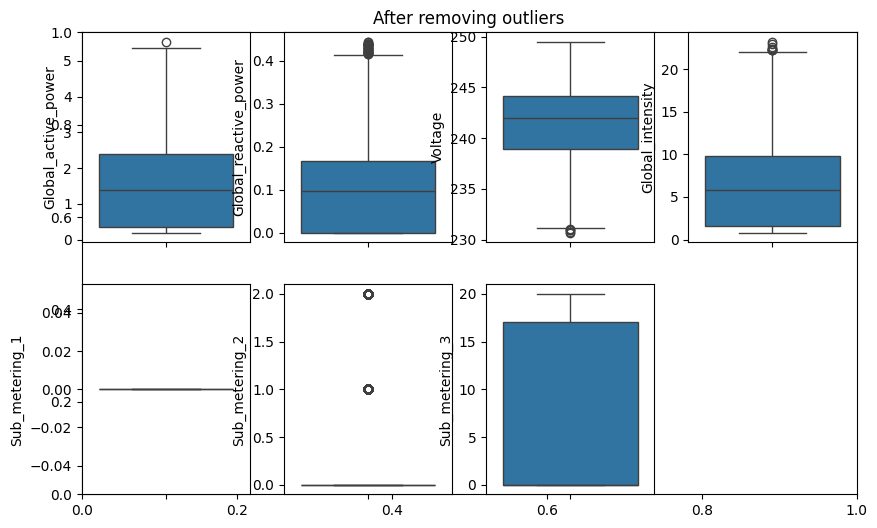

In [17]:
plt.figure(figsize=(10,6))
plt.title('After removing outliers')
i=1
for col in cols:
    plt.subplot(2,4,i)
    sns.boxplot(df[col])
    i+=1
plt.show()

In [18]:
df.shape

(8737, 9)

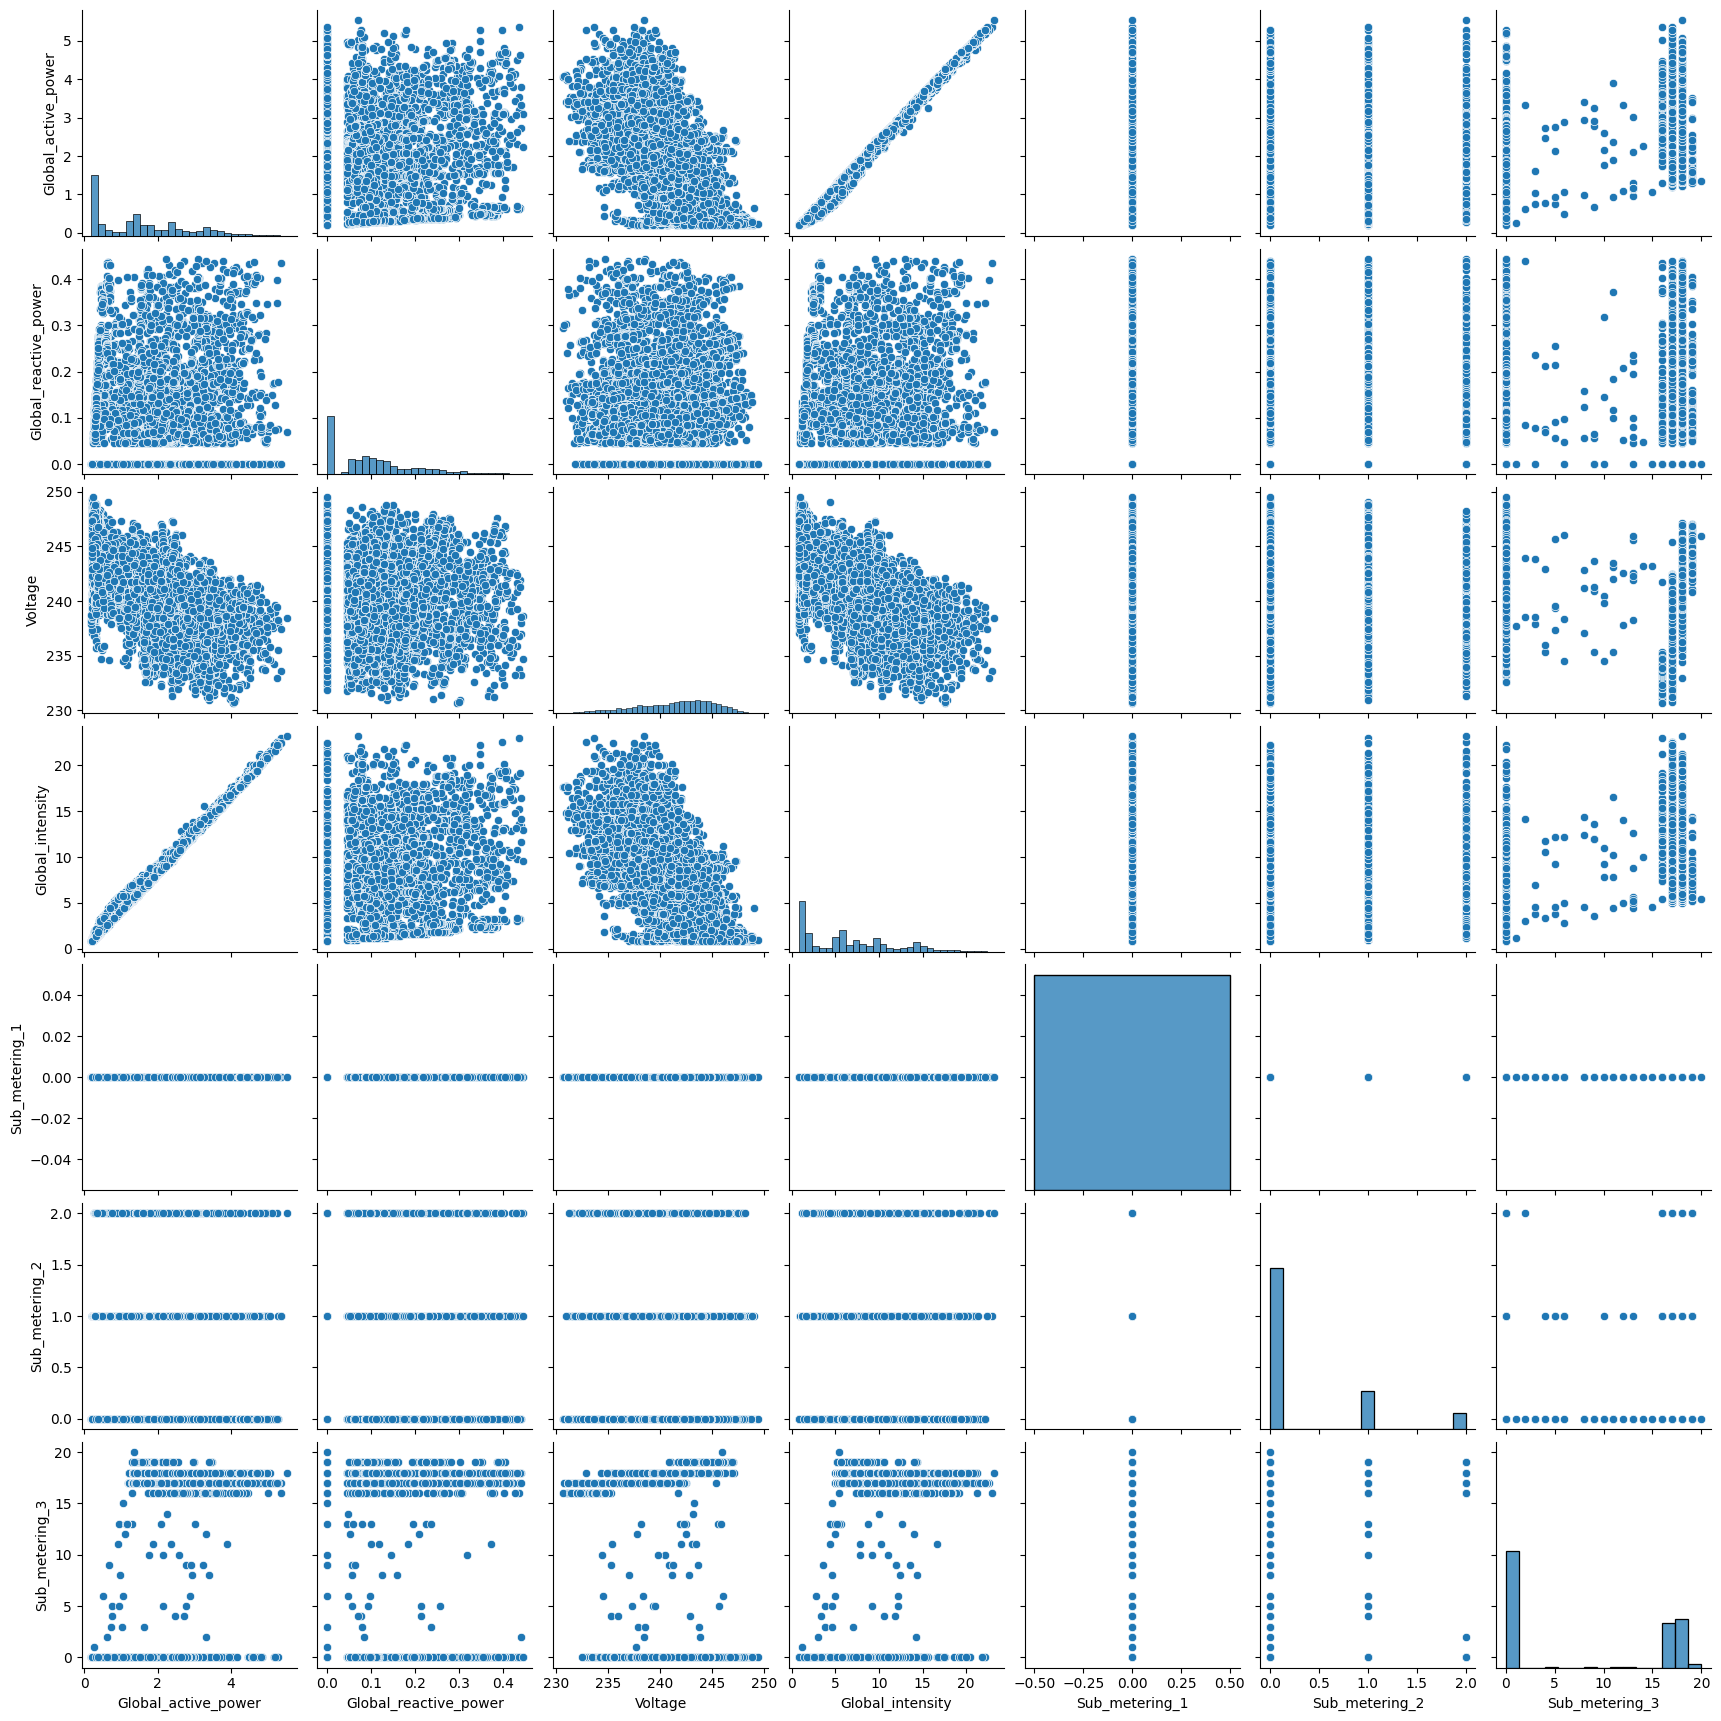

In [19]:
#Pair plots
import seaborn as sns
sns.pairplot(df)

In [20]:
df['act_engy_consumed_per_min'] = (df.Global_active_power*1000)/60 - df.Sub_metering_1 - df.Sub_metering_2 - df.Sub_metering_3

In [21]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,act_engy_consumed_per_min
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
13,16/12/2006,17:37:00,5.268,0.398,232.91,22.6,0.0,2.0,17.0,68.800000
14,16/12/2006,17:38:00,4.054,0.422,235.24,17.6,0.0,1.0,17.0,49.566667
15,16/12/2006,17:39:00,3.384,0.282,237.14,14.2,0.0,0.0,17.0,39.400000


In [22]:
from sklearn.model_selection import train_test_split
x = df.iloc[:,3:-1]
y = df.iloc[:,2:3]
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.3, random_state=42)
x_train.head()

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
9762,0.000,241.77,5.8,0.0,0.0,0.0
4714,0.106,246.54,2.4,0.0,0.0,0.0
2244,0.104,240.36,20.0,0.0,0.0,0.0
3152,0.074,239.73,6.2,0.0,0.0,0.0
6252,0.000,244.94,5.2,0.0,0.0,18.0


In [23]:
x_test.head()

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1410,0.100,235.31,14.2,0.0,0.0,17.0
1695,0.390,241.07,13.0,0.0,1.0,18.0
6039,0.174,234.62,15.4,0.0,0.0,17.0
1562,0.208,234.48,9.0,0.0,1.0,16.0
1979,0.000,246.98,0.8,0.0,0.0,0.0


In [24]:
y_test.head()

,Global_active_power
1410,3.328
1695,3.120
6039,3.622
1562,2.134
1979,0.210


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, roc_curve, r2_score, mean_absolute_error

lr = LinearRegression()

lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error ", mse)
print("Root Mean Squared Error: ", rmse)
print("Mean aboslute error: ", mae)
print("R Square value: ", r2)

Mean squared error  0.0041991086603888625
Root Mean Squared Error:  0.06480052978478543
Mean aboslute error:  0.03715720462467775
R Square value:  0.9971395321072416


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, roc_curve, r2_score, mean_absolute_error

rfr = RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=42)

rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error ", mse)
print("Root Mean Squared Error: ", rmse)
print("Mean aboslute error: ", mae)
print("R Square value: ", r2)

Mean squared error  0.002536413142924823
Root Mean Squared Error:  0.050362815081415206
Mean aboslute error:  0.023375667762401176
R Square value:  0.9982721741814999


c:\Users\navee\OneDrive\Documents\Courses\Projects\electricity_consumption_ML\env\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [27]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 10,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [32]:
#Hyperparameter tuning 
from sklearn.model_selection import RandomizedSearchCV

param_distri = {
    'n_estimators' :    [int(x) for x in np.linspace(start=50, stop= 500, num= 10)],
    'max_depth' : [None]+[int(x) for x in np.linspace(10, 110, num=11)],
    'min_samples_split' : [None]+[2,5, 10],
    'min_samples_leaf' : [None]+[1,2,4],
    'max_features' : ['auto','sqrt'],
    'bootstrap' : [True, False]
}

In [33]:
random_search = RandomizedSearchCV(
    estimator=rfr,
    param_distributions=param_distri,
    n_iter=10,
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\navee\OneDrive\Documents\Courses\Projects\electricity_consumption_ML\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\navee\OneDrive\Documents\Courses\Projects\electricity_consumption_ML\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\navee\OneDrive\Documents\Courses\Projects\electricity_consumption_ML\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=10, n_jobs=-1,
                                                   random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100,
                                                      110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [None, 1, 2, 4],
                                        'min_samples_split': [None, 2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   random_state=42, scoring='r2', verbose=2)

In [34]:
random_search.best_params_

{'n_estimators': 150,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [35]:
random_search.best_score_

np.float64(0.9955971534784578)

In [36]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, root_mean_squared_error, roc_curve, r2_score, mean_absolute_error

xg_model = xgb.XGBRegressor(n_estimators=10, max_depth = 5, learning_rate = 0.1, n_jobs=-1, random_state=42)

xg_model.fit(x_train, y_train)
y_pred = xg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error ", mse)
print("Root Mean Squared Error: ", rmse)
print("Mean aboslute error: ", mae)
print("R Square value: ", r2)

Mean squared error  0.18531446016846564
Root Mean Squared Error:  0.4304816606644999
Mean aboslute error:  0.36071993967070093
R Square value:  0.8737622499465942
